### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


### Load the Dataset

In [3]:
df = pd.read_csv('student_exam_data.csv')
print(df.head())
print(df.describe())
print(df.info())


   Hours_Studied  Previous_Exam_Score  Attendance  Exam_Score
0      11.490142            90.990332   78.248217   39.152776
1       9.585207            83.869505   83.554813   42.362493
2      11.943066            70.894456   77.075801   40.587002
3      14.569090            60.295948   81.920385   51.195845
4       9.297540            80.473350   66.063853   44.786311
       Hours_Studied  Previous_Exam_Score   Attendance   Exam_Score
count    1000.000000          1000.000000  1000.000000  1000.000000
mean       10.056438            70.923083    84.769571    43.165462
std         2.931949            14.645680     9.239386     6.954149
min         0.276198            25.894170    54.804878    20.597148
25%         8.057229            60.906375    78.520004    38.624942
50%        10.075902            70.946157    84.997492    43.133710
75%        11.943832            80.933233    91.609153    47.821608
max        20.000000           100.000000   100.000000    64.127981
<class 'pandas.c

### Exploratory Data Analysis (EDA)

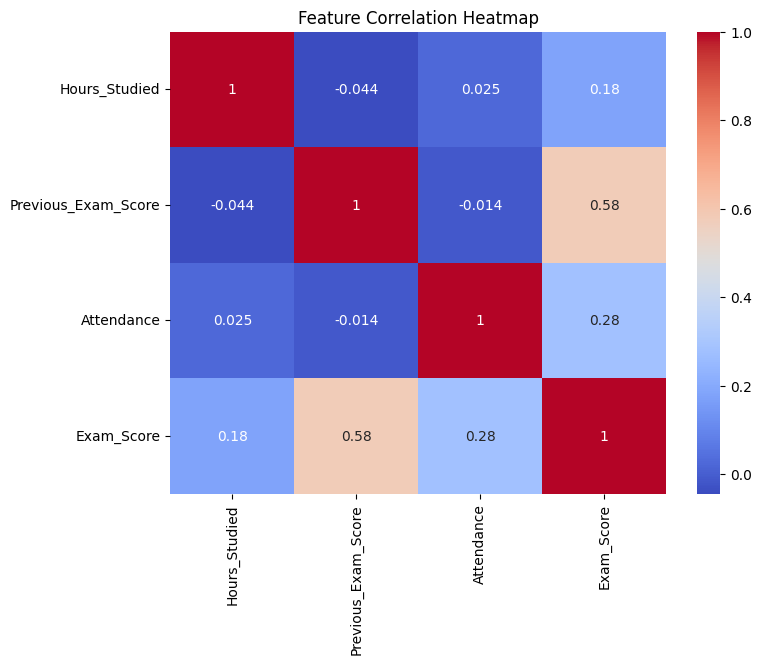

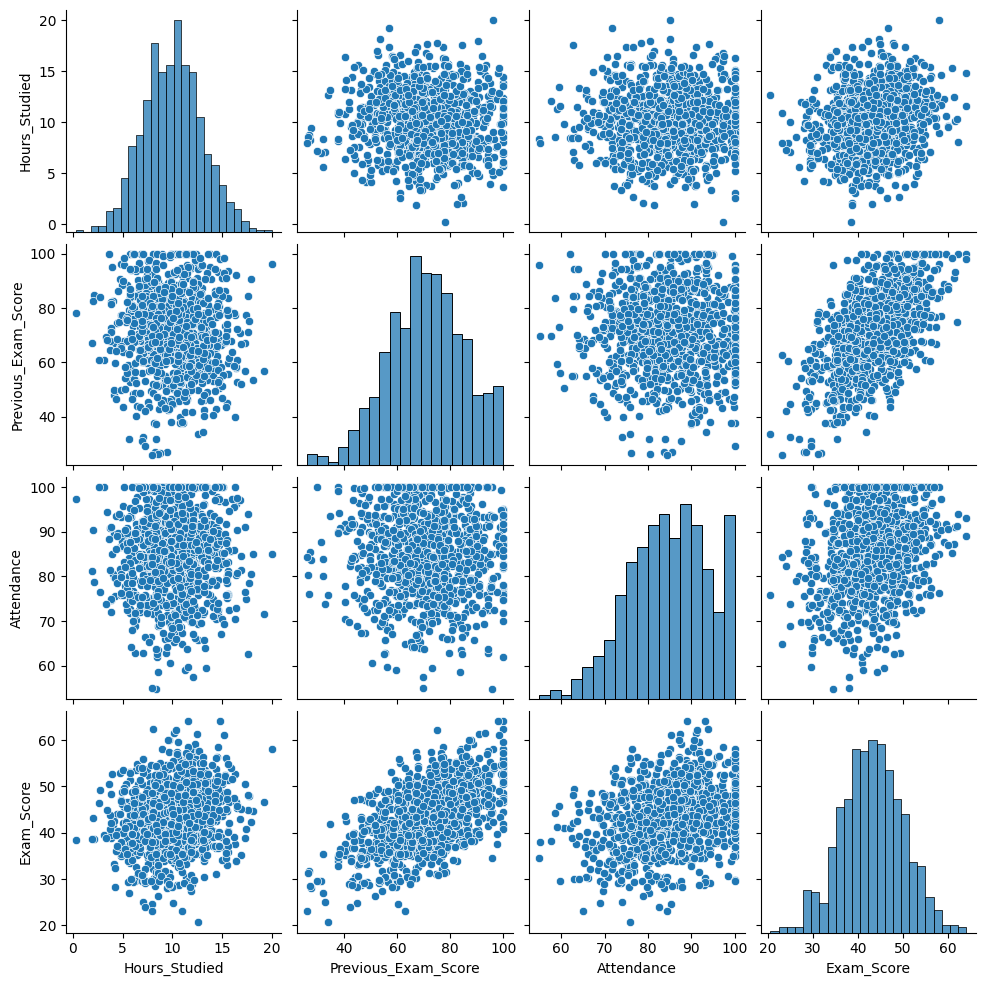

In [4]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution plots
sns.pairplot(df)
plt.show()


### Feature Selection & Splitting

In [5]:
# Define input features and target variable
X = df[['Hours_Studied', 'Previous_Exam_Score', 'Attendance']]
y = df['Exam_Score']

# Split into training and testing sets (80–20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


###  Train the Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [1.42101098 3.94325589 2.1535797 ]
Intercept: 43.22887128028955


### Model Evaluation

In [8]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 4.13
RMSE: 5.18
R² Score: 0.47


### Visualization of Predictions

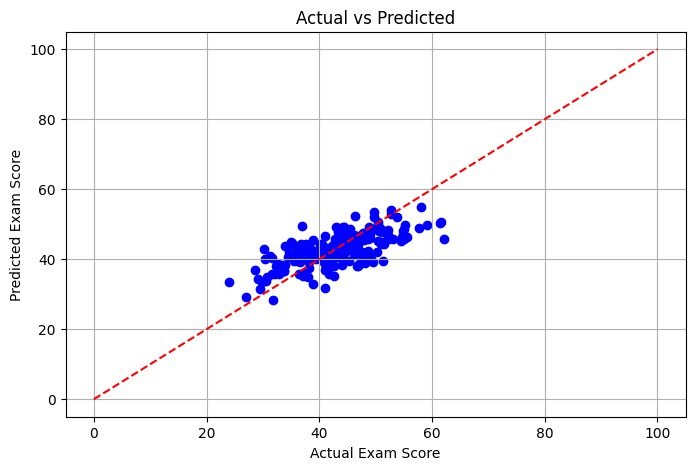

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()


### Save the Trained Model

In [10]:
import joblib
joblib.dump(model, 'exam_score_predictor.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

### Test Cell: Predict Exam Score for a New Student

In [11]:
import joblib
import numpy as np

# Load saved model and scaler
model = joblib.load('exam_score_predictor.pkl')
scaler = joblib.load('scaler.pkl')

#  Enter new student data: [Hours_Studied, Previous_Exam_Score, Attendance]
new_student = np.array([[12, 75, 90]])

# Scale the input
new_student_scaled = scaler.transform(new_student)

# Predict
predicted_score = model.predict(new_student_scaled)

# Display the result
print(f" Predicted Exam Score: {predicted_score[0]:.2f}")


 Predicted Exam Score: 46.39


C:\Users\morey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
